# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
uni_lat_lngs=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        uni_lat_lngs.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
lat=[]
lngs=[]
lat,lngs=zip(*uni_lat_lngs)

In [4]:
lngs

(-86.18470257006403,
 42.2868202027702,
 29.949638629254196,
 75.75393613021785,
 140.47569721214825,
 176.0590952729666,
 -80.8048030813827,
 179.24595886762165,
 -16.067061338547916,
 -100.67281374660483,
 -38.44403812077911,
 -65.29340178069936,
 -138.15924243876077,
 -125.1749195582924,
 7.042717791084016,
 -37.126788305915,
 170.99517951307922,
 30.889352050670652,
 -67.80808394227938,
 -161.74519244479268,
 44.0734626800153,
 -86.81903071650764,
 54.59588298943197,
 -11.235702237810528,
 -73.55711076307801,
 153.6894456110067,
 97.33393600427837,
 158.80588240641947,
 -110.58704726616456,
 134.33067167046335,
 52.59528865470733,
 127.925219549622,
 -69.19655320720788,
 54.14720184881406,
 42.76687677675898,
 -64.12737547374319,
 -75.3163201858381,
 -42.065877058162584,
 55.60994534797982,
 -140.14778597011838,
 -1.9988830805916393,
 -30.057886834626203,
 87.9802366373545,
 -51.42902234729803,
 -149.21364999500705,
 46.87358432027057,
 -17.49907542861797,
 -15.75829108183683,
 -26

In [5]:
#split cities into sets
chunks = [cities[x:x+50] for x in range(0, len(cities), 50)]

#Create dataframe
city_df=pd.DataFrame(cities)
city_df=city_df.rename(columns={0:"City"})
city_df["Lat"]=lat
city_df["Lng"]=lngs
city_df

,City,Lat,Lng
0,lebu,-38.666189,-86.184703
1,lukovetskiy,64.553805,42.286820
2,gweru,-19.287251,29.949639
3,hithadhoo,-6.642373,75.753936
4,nizhneyansk,87.093350,140.475697
5,waipawa,-43.490606,176.059095
6,jipijapa,-1.543607,-80.804803
7,isangel,-24.052137,179.245959
8,dingle,50.543526,-16.067061
9,lexington,39.588266,-100.672814


In [6]:
len(chunks)

13

In [7]:
len(chunks[0])

50

In [8]:
city_df["Cloudiness"]=''
city_df["Country"]=''
city_df["Date"]=''
city_df["Humidity"]=''
city_df["Max Temp"]=''
city_df["Wind Speed"]=''
city_df.head()

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,lebu,-38.666189,-86.184703,,,,,,
1,lukovetskiy,64.553805,42.286820,,,,,,
2,gweru,-19.287251,29.949639,,,,,,
3,hithadhoo,-6.642373,75.753936,,,,,,
4,nizhneyansk,87.093350,140.475697,,,,,,


In [9]:
#set para
units = "metric "
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="

In [82]:
len(city_df)

609

In [84]:
print("hell")
time.sleep(5)
print("ok")

hell
ok


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#define sleep time
num=1
#loop through dataframe
for index, row in city_df.iterrows(): 
        city = row["City"]
        try:
            time.sleep(num)
            response = requests.get(query_url+city).json()
            print(f"Processing Record {(index+1)} of {len(city_df)} | {city}")
            city_df.loc[index, "Country"] = response["sys"]["country"]
            city_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
            city_df.loc[index, "Humidity"] = response["main"]["humidity"]
            city_df.loc[index, "Date"] = response["dt"]
            city_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
            city_df.loc[index, "Wind Speed"]=response["wind"]["speed"]
        except:
            print("City not found. Skipping...")

Processing Record 1 of 609 | lebu
Processing Record 2 of 609 | lukovetskiy
Processing Record 3 of 609 | gweru
Processing Record 4 of 609 | hithadhoo
Processing Record 5 of 609 | nizhneyansk
City not found. Skipping...
Processing Record 6 of 609 | waipawa
Processing Record 7 of 609 | jipijapa
Processing Record 8 of 609 | isangel
Processing Record 9 of 609 | dingle
Processing Record 10 of 609 | lexington
Processing Record 11 of 609 | cidreira
Processing Record 12 of 609 | rawson
Processing Record 13 of 609 | hilo
Processing Record 14 of 609 | norman wells
Processing Record 15 of 609 | henties bay
Processing Record 16 of 609 | ponta do sol
Processing Record 17 of 609 | karamea
City not found. Skipping...
Processing Record 18 of 609 | sulina
City not found. Skipping...
Processing Record 19 of 609 | nantucket
Processing Record 20 of 609 | barrow
Processing Record 21 of 609 | east london
Processing Record 22 of 609 | punta arenas
Processing Record 23 of 609 | victoria
Processing Record 24 of

Processing Record 195 of 609 | puerto baquerizo moreno
Processing Record 196 of 609 | santiago tuxtla
Processing Record 197 of 609 | aklavik
Processing Record 198 of 609 | vao
Processing Record 199 of 609 | kavieng
Processing Record 200 of 609 | husavik
Processing Record 201 of 609 | tual
Processing Record 202 of 609 | mount darwin
Processing Record 203 of 609 | poya
Processing Record 204 of 609 | saleaula
City not found. Skipping...
Processing Record 205 of 609 | geraldton
Processing Record 206 of 609 | sterling
Processing Record 207 of 609 | port lincoln
Processing Record 208 of 609 | amazar
Processing Record 209 of 609 | monrovia
Processing Record 210 of 609 | vestmanna
Processing Record 211 of 609 | shinpokh
Processing Record 212 of 609 | huanren
Processing Record 213 of 609 | kuusamo
Processing Record 214 of 609 | northam
Processing Record 215 of 609 | arraial do cabo
Processing Record 216 of 609 | beira
Processing Record 217 of 609 | gavle
Processing Record 218 of 609 | longyearb

Processing Record 390 of 609 | tigil
Processing Record 391 of 609 | palmer
Processing Record 392 of 609 | poum
Processing Record 393 of 609 | bandarbeyla
Processing Record 394 of 609 | kandi
Processing Record 395 of 609 | chimbote
Processing Record 396 of 609 | constitucion
Processing Record 397 of 609 | evanston
Processing Record 398 of 609 | yar-sale
Processing Record 399 of 609 | tabuk
Processing Record 400 of 609 | raga
City not found. Skipping...
Processing Record 401 of 609 | diamantino
Processing Record 402 of 609 | toliary
City not found. Skipping...
Processing Record 403 of 609 | bathsheba
Processing Record 404 of 609 | chernyshevskiy
Processing Record 405 of 609 | faya
Processing Record 406 of 609 | antalya
Processing Record 407 of 609 | venado tuerto
Processing Record 408 of 609 | santa isabel do rio negro
Processing Record 409 of 609 | djougou
Processing Record 410 of 609 | paita
Processing Record 411 of 609 | gulmarg
Processing Record 412 of 609 | safwah
City not found. Sk

Processing Record 585 of 609 | shestakovo
Processing Record 586 of 609 | urulga
City not found. Skipping...
Processing Record 587 of 609 | agadez
Processing Record 588 of 609 | tabiauea
City not found. Skipping...
Processing Record 589 of 609 | manokwari
Processing Record 590 of 609 | mankono
Processing Record 591 of 609 | la libertad
Processing Record 592 of 609 | port blair
Processing Record 593 of 609 | cabedelo
Processing Record 594 of 609 | marcona
City not found. Skipping...
Processing Record 595 of 609 | newport
Processing Record 596 of 609 | hofn
Processing Record 597 of 609 | bucerias
Processing Record 598 of 609 | constantine
Processing Record 599 of 609 | vung tau
Processing Record 600 of 609 | may pen
Processing Record 601 of 609 | kieta
Processing Record 602 of 609 | gniezno
Processing Record 603 of 609 | noumea
Processing Record 604 of 609 | gurupa
City not found. Skipping...
Processing Record 605 of 609 | lolua
City not found. Skipping...
Processing Record 606 of 609 | t

In [12]:
city_df.head()
#for i in range(len(chunks)):
#    for j in range(len(chunks[i])):
#        try:  
#           print(f"Processing of Record {j+1} of set {i+1} | {chunks[i][j]}")
#        except:
#           print("City not found, Skipping")  

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,lebu,-38.666189,-86.184703,40,ET,1573018921,62,288.15,3.1
1,lukovetskiy,64.553805,42.286820,90,RU,1573019274,92,265.15,2.16
2,gweru,-19.287251,29.949639,30,ZW,1573019274,28,296.65,2.94
3,hithadhoo,-6.642373,75.753936,81,MV,1573018921,72,301.12,3.44
4,nizhneyansk,87.093350,140.475697,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#city_df["Datetime"]=pd.to_datetime(city_df['Date']).apply(lambda x: x.date())
city_df["Datetime"]=pd.to_datetime(city_df['Date'],unit='s').dt.date
city_df.head()

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Datetime
0,lebu,-38.666189,-86.184703,40,ET,1573018921,62,288.15,3.1,2019-11-06
1,lukovetskiy,64.553805,42.286820,90,RU,1573019274,92,265.15,2.16,2019-11-06
2,gweru,-19.287251,29.949639,30,ZW,1573019274,28,296.65,2.94,2019-11-06
3,hithadhoo,-6.642373,75.753936,81,MV,1573018921,72,301.12,3.44,2019-11-06
4,nizhneyansk,87.093350,140.475697,,,,,,,NaT


In [14]:
# Build query URL and request your results in Celsius
#query_url = f"{url}appid={api_key}&q={city}&units={units}"
# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

In [15]:
#city_df["Lat"]=pd.to_numeric(city_df["Lat"])
city_df["Lat_float"]=pd.to_numeric(city_df["Lat"], downcast='float')
city_df["Max Temp float"]=pd.to_numeric(city_df["Max Temp"], downcast='float')
city_df["Humidity float"]=pd.to_numeric(city_df["Humidity"], downcast='float')
city_df["Cloudiness float"]=pd.to_numeric(city_df["Cloudiness"], downcast='float')
city_df["Wind Speed float"]=pd.to_numeric(city_df["Wind Speed"], downcast='float')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

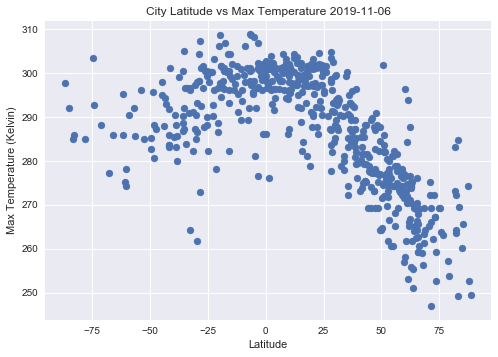

In [105]:
plt.style.use("seaborn")
# Build a scatter plot for each data type
plt.scatter(city_df["Lat_float"], city_df["Max Temp float"], marker="o")
date=city_df["Datetime"][0]
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {date}")
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsMaxTemperature.png")

# Show plot
plt.show()

In [100]:
f'abc {city_df["Datetime"][0]}'

abc 2019-11-06


In [135]:
import statsmodels.api as sm
city_df_clean=city_df.dropna()
X = city_df_clean["Lat_float"]
y = city_df_clean["Max Temp"]
X_1 = sm.add_constant(X)
# Note the difference in argument order

model = sm.OLS(y, X_1).fit()
predictions = model.predict(X_1) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\16478\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max Temp   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           5.57e-57
Time:                        18:23:30   Log-Likelihood:                -2082.3
No. Observations:                 552   AIC:                             4169.
Df Residuals:                     550   BIC:                             4177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        290.8165      0.502    579.785      0.000     289.831     291.802
Lat_float     -0.2151      0.012    -17.936      0.000      -0.239      -0.192
==============================================================================
Omnibus:                       23.404   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.318
Skew:                          -0.511   Prob(JB):                     3.18e-06
Kurtosis:                       2.764   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

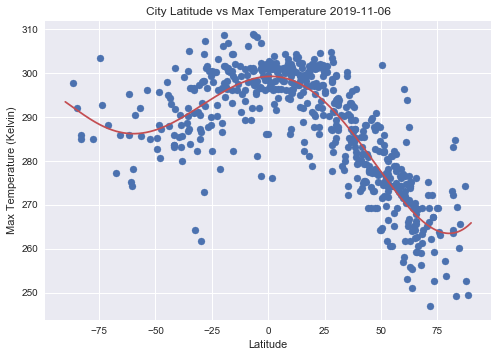

In [158]:
import numpy.polynomial.polynomial as poly
#plt.scatter(X,y)
#X_plot = np.linspace(-100,100,1000)
#plt.plot(X_plot, X_plot*model.params[1]+model.params[0])
plt.style.use("seaborn")
# Build a scatter plot for each data type
plt.scatter(city_df["Lat_float"], city_df["Max Temp float"], marker="o")
date=city_df["Datetime"][0]

coefs = np.polynomial.polynomial.polyfit(city_df_clean["Lat_float"], city_df_clean["Max Temp float"], 6)


x=city_df_clean["Lat_float"]
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
x_new =np.linspace(-90,90,1000)
plt.plot(x_new, ffit(x_new),"r")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {date}")
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("LatitudevsMaxTemperature.png")

# Show plot
plt.show()


In [142]:
coefs

array([ 2.9895270e+02,  1.4642462e-02, -8.7033603e-03, -5.2090621e-05,
        8.1124972e-07,  3.7702832e-09], dtype=float32)

-38.666187

#### Latitude vs. Humidity Plot

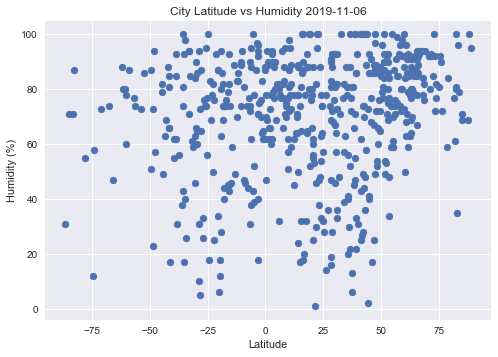

In [106]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat_float"], city_df["Humidity float"], marker="o")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

# Show plot
plt.show()

In [47]:
#import statsmodels.api as sm

In [160]:
city_df_clean=city_df.dropna()
X = city_df_clean["Lat_float"]
y = city_df_clean["Humidity float"]
X_1 = sm.add_constant(X)
# Note the difference in argument order

model = sm.OLS(y, X_1).fit()
predictions = model.predict(X_1) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\16478\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Humidity float   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     19.96
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           9.59e-06
Time:                        18:47:11   Log-Likelihood:                -2480.3
No. Observations:                 552   AIC:                             4965.
Df Residuals:                     550   BIC:                             4973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5579      1.032     66.463      0.000      66.532      70.584
Lat_float      0.1102      0.025      4.468      0.000       0.062       0.159
==============================================================================
Omnibus:                       66.353   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.901
Skew:                          -0.963   Prob(JB):                     8.18e-20
Kurtosis:                       3.332   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

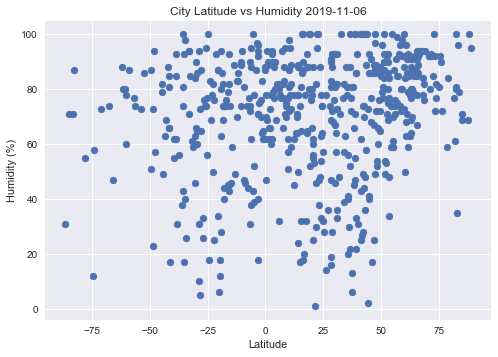

In [161]:
plt.scatter(X,y)

plt.title(f"City Latitude vs Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#X_plot = np.linspace(-100,100,1000)
#plt.plot(X_plot, X_plot*model.params[1]+model.params[0])
plt.show()

#### Latitude vs. Cloudiness Plot

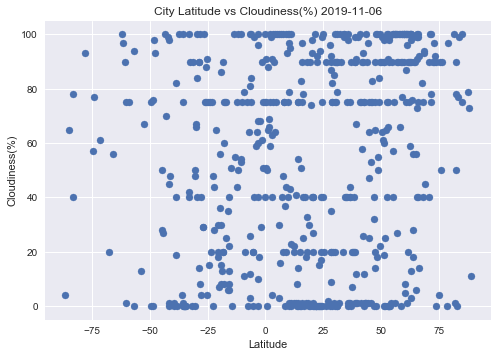

In [126]:
plt.scatter(city_df["Lat_float"], city_df["Cloudiness float"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness(%) {date}")

plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show plot
plt.show()

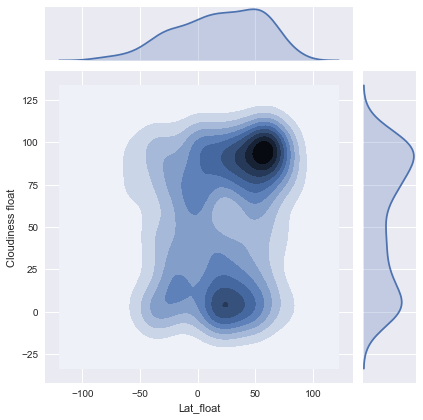

In [131]:
import seaborn as sns
sns.jointplot(x=city_df["Lat_float"], y=city_df["Cloudiness float"], kind="kde")

#### Latitude vs. Wind Speed Plot

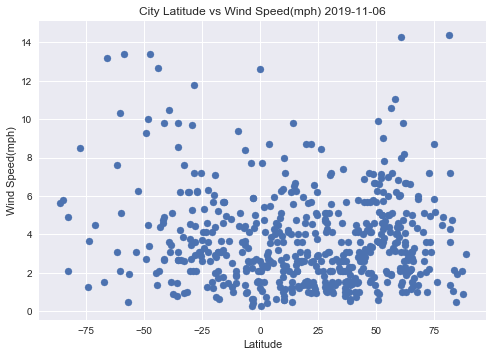

In [108]:
plt.scatter(city_df["Lat_float"], city_df["Wind Speed float"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed(mph) {date}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

# Show plot
plt.show()

In [115]:
df=city_df_clean[["Lat_float","Wind Speed float"]]
df.head()

,Lat_float,Wind Speed float
0,-38.666187,3.10
1,64.553802,2.16
2,-19.287251,2.94
3,-6.642373,3.44
5,-43.490604,2.09


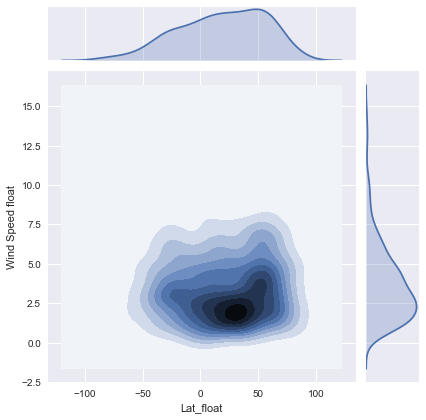

In [119]:
import seaborn as sns
sns.jointplot(x=df["Lat_float"],y=df["Wind Speed float"],kind="kde")

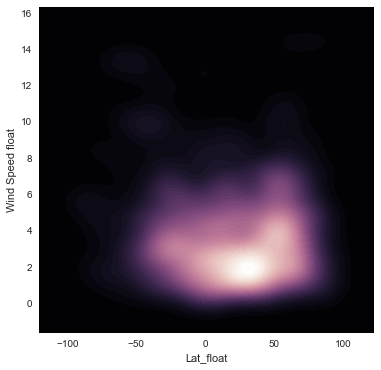

In [121]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df["Lat_float"], df["Wind Speed float"], cmap=cmap, n_levels=60, shade=True)

In [30]:
#plot citys
import gmplot
from gkey import gkey

In [31]:
figure_layout = {
    "width": "400px",
    "height": "300px",
    "border" : "1px solid black",
    "padding" : "1px",
    "margin" : "0 auto 0 auto"
}

In [32]:
gmap = gmplot.GoogleMapPlotter(0, 0, 2)

In [33]:
# plot heatmap(to do)
gmap.heatmap(city_df["Lat"], city_df["Lng"])
gmap.scatter(city_df["Lat"], city_df["Lat"], c='r', marker=True)
#Your Google_API_Key
gmap.apikey = gkey
# save it to html
gmap.draw(r"C:\Users\16478\Desktop\country_heatmap.html")

In [41]:
city_df['Max Temp']=pd.to_numeric(city_df['Max Temp'], downcast='float')
locations = city_df[['Lat', 'Lng']]
weights = city_df['Max Temp']

In [42]:
#fig = gmaps.figure((map_type='HYBRID'))
#heatmap_layer = fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
#fig

Figure(layout=FigureLayout(height='420px'))